#  Retail and Ecommerce assignment

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

 

To understand how to approach this problem using data science, let’s first understand the payment process at Schuster now. Every time a transaction of goods takes place with a vendor, the accounting team raises an invoice and shares it with the vendor. This invoice contains the details of the goods, the invoice value, the creation date and the payment due date based on the credit terms as per the contract. Business with these vendors occurs quite frequently. Hence, there are always multiple invoices associated with each vendor at any given time.

In [15]:
## loading important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [16]:
## loading the received payments file

pre_data = pd.read_csv("mid - assignment Received_Payments_Data.csv", header = "infer")

pre_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [17]:
## checking shape 

pre_data.shape

(93937, 16)

In [18]:
## basic info check 

pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [12]:
pre_data.RECEIPT_DOC_NO.isna().sum()

29

In [13]:
pre_data.RECEIPT_DOC_NO.is_unique

False

In [19]:
## Dropping the unneccassry columns 

list1 = ["CUSTOMER_NUMBER", "RECEIPT_DOC_NO"]

pre_data.drop(list1, axis = 1, inplace= True)

In [20]:
pre_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [21]:
## converting the date columns to datetime format 

pre_data["INVOICE_CREATION_DATE"]= pd.to_datetime(pre_data["INVOICE_CREATION_DATE"])

In [22]:
pre_data["DUE_DATE"]

0        30-Dec-20
1        28-Jan-21
2         1-Mar-21
3        14-Jan-21
4        14-Jan-21
           ...    
93932    28-Dec-20
93933    28-Dec-20
93934    28-Dec-20
93935    24-Mar-21
93936    30-Mar-21
Name: DUE_DATE, Length: 93937, dtype: object

In [23]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   RECEIPT_DATE           93937 non-null  object        
 3   CLASS                  93937 non-null  object        
 4   CURRENCY_CODE          93937 non-null  object        
 5   Local Amount           93937 non-null  float64       
 6   USD Amount             93937 non-null  float64       
 7   INVOICE_ALLOCATED      93937 non-null  object        
 8   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 9   DUE_DATE               93937 non-null  object        
 10  PAYMENT_TERM           93937 non-null  object        
 11  INVOICE_CLASS          93937 non-null  object        
 12  INVOICE_CURRENCY_CODE  93937 non-null  object        
 13  I

In [24]:
pre_data["DUE_DATE"]= pd.to_datetime(pre_data["DUE_DATE"])

In [25]:
pre_data["RECEIPT_DATE"]=pd.to_datetime(pre_data["RECEIPT_DATE"])

In [26]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   RECEIPT_DATE           93937 non-null  datetime64[ns]
 3   CLASS                  93937 non-null  object        
 4   CURRENCY_CODE          93937 non-null  object        
 5   Local Amount           93937 non-null  float64       
 6   USD Amount             93937 non-null  float64       
 7   INVOICE_ALLOCATED      93937 non-null  object        
 8   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 9   DUE_DATE               93937 non-null  datetime64[ns]
 10  PAYMENT_TERM           93937 non-null  object        
 11  INVOICE_CLASS          93937 non-null  object        
 12  INVOICE_CURRENCY_CODE  93937 non-null  object        
 13  I

In [27]:
pre_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


In [28]:
pre_data["USD Amount"] = pre_data["USD Amount"].round(2)

In [29]:
## now there is no null and all the data types are also fixed 

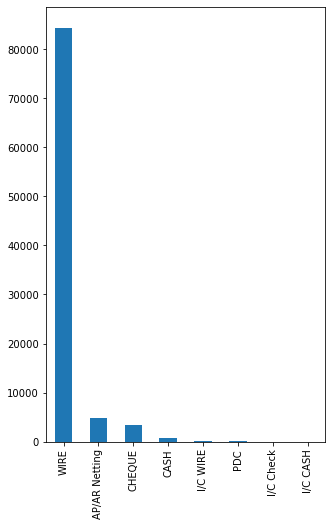

In [30]:
## lets do some EDA on the data 

plt.figure(figsize = (5,8))

pre_data["RECEIPT_METHOD"].value_counts().plot.bar()

plt.show()

<AxesSubplot:xlabel='USD Amount'>

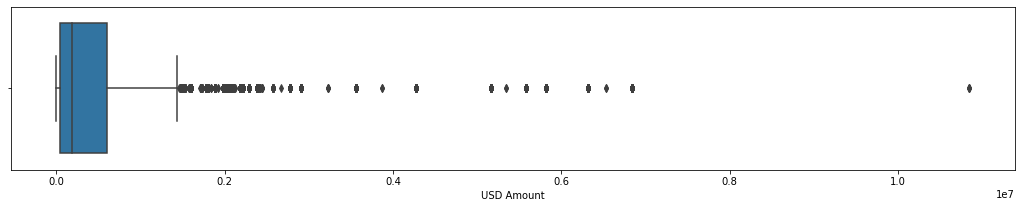

In [31]:
## Outliers checking, clearly see that this columns is not normal distributed and has high values 

plt.figure(figsize = (18,3))
sns.boxplot(pre_data["USD Amount"])

<AxesSubplot:xlabel='Local Amount'>

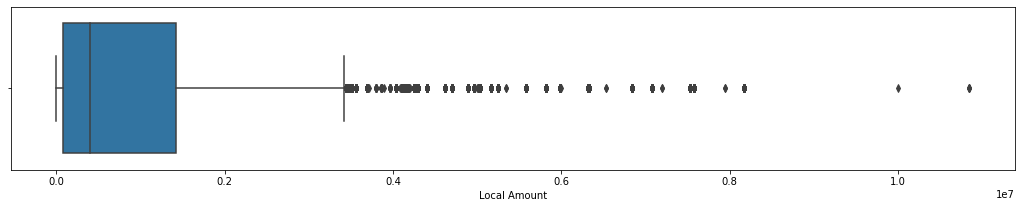

In [32]:
## Outliers checking, clearly see that this columns is not normal distributed and has high values 

plt.figure(figsize = (18,3))
sns.boxplot(pre_data["Local Amount"])

In [34]:
## checing the basic stats of the numerical columns 

pre_data.describe()

,Local Amount,USD Amount
count,9.393700e+04,9.393700e+04
mean,1.066470e+06,5.312013e+05
std,1.546901e+06,9.508693e+05
min,0.000000e+00,0.000000e+00
25%,8.198039e+04,3.766298e+04
50%,4.053438e+05,1.810010e+05
75%,1.425606e+06,5.996137e+05
max,1.084983e+07,1.084983e+07


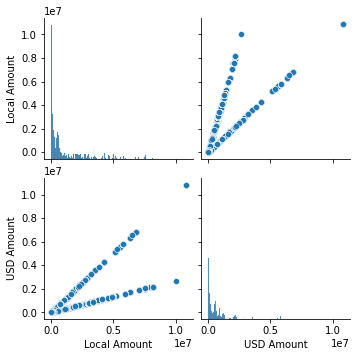

In [37]:
sns.pairplot(pre_data)
plt.show()

In [38]:
pre_data["CLASS"].value_counts()

PMT    93937
Name: CLASS, dtype: int64

In [39]:
## converting the categorical to numerical as binary 

pre_data["INVOICE_TYPE"] = pre_data["INVOICE_TYPE"].map({"Non Goods" : 0 , "Goods" : 1})

In [40]:
pre_data.drop("CLASS", axis= 1, inplace= True)

In [41]:
pre_data.drop("INVOICE_ALLOCATED", axis = 1, inplace=True)

In [42]:
pre_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,2021-04-20,USD,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,0
1,WIRE,RADW Corp,2021-01-31,SAR,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,0
2,WIRE,RADW Corp,2021-01-31,SAR,157500.00,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,0
3,WIRE,FARO Corp,2021-01-31,SAR,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,0
4,WIRE,RADW Corp,2021-01-31,SAR,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,0


In [43]:
dummy1 = pd.get_dummies(pre_data[["RECEIPT_METHOD", "CURRENCY_CODE", "INVOICE_CLASS"]], drop_first = True )
                                 

                                 
                                 

In [44]:
dummy1.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_KWD,CURRENCY_CODE_QAR,CURRENCY_CODE_SAR,CURRENCY_CODE_USD,INVOICE_CLASS_DM,INVOICE_CLASS_INV
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [45]:
pre_data = pd.concat([dummy1, pre_data], axis= 1)

In [46]:
pre_data.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,0,0,0,0,0,0,1,0,0,0,...,2021-04-20,USD,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,0
1,0,0,0,0,0,0,1,0,0,0,...,2021-01-31,SAR,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,0
2,0,0,0,0,0,0,1,0,0,0,...,2021-01-31,SAR,157500.00,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,0
3,0,0,0,0,0,0,1,0,0,0,...,2021-01-31,SAR,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,0
4,0,0,0,0,0,0,1,0,0,0,...,2021-01-31,SAR,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,0


In [47]:
pre_data1 = pre_data.drop(["RECEIPT_METHOD", "CURRENCY_CODE", "INVOICE_CLASS"], axis= 1)

In [48]:
pre_data1.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,INVOICE_CLASS_INV,CUSTOMER_NAME,RECEIPT_DATE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,0,0,0,0,0,0,1,0,0,0,...,1,C EA Corp,2021-04-20,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,AED,0
1,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,SAR,0
2,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,157500.00,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,SAR,0
3,0,0,0,0,0,0,1,0,0,0,...,1,FARO Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,SAR,0
4,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,SAR,0


In [49]:
pre_data.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,0,0,0,0,0,0,1,0,0,0,...,2021-04-20,USD,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,0
1,0,0,0,0,0,0,1,0,0,0,...,2021-01-31,SAR,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,0
2,0,0,0,0,0,0,1,0,0,0,...,2021-01-31,SAR,157500.00,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,0
3,0,0,0,0,0,0,1,0,0,0,...,2021-01-31,SAR,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,0
4,0,0,0,0,0,0,1,0,0,0,...,2021-01-31,SAR,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,0


In [50]:
pre_data.columns

Index(['RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_I/C CASH', 'RECEIPT_METHOD_I/C Check',
       'RECEIPT_METHOD_I/C WIRE', 'RECEIPT_METHOD_PDC', 'RECEIPT_METHOD_WIRE',
       'CURRENCY_CODE_BHD', 'CURRENCY_CODE_EUR', 'CURRENCY_CODE_GBP',
       'CURRENCY_CODE_KWD', 'CURRENCY_CODE_QAR', 'CURRENCY_CODE_SAR',
       'CURRENCY_CODE_USD', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'Local Amount', 'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

In [51]:
pre_data1 = pre_data.drop(["RECEIPT_METHOD", "CURRENCY_CODE", "INVOICE_CLASS", "INVOICE_CURRENCY_CODE"], axis= 1)

In [52]:
pre_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   RECEIPT_METHOD_CASH       93937 non-null  uint8         
 1   RECEIPT_METHOD_CHEQUE     93937 non-null  uint8         
 2   RECEIPT_METHOD_I/C CASH   93937 non-null  uint8         
 3   RECEIPT_METHOD_I/C Check  93937 non-null  uint8         
 4   RECEIPT_METHOD_I/C WIRE   93937 non-null  uint8         
 5   RECEIPT_METHOD_PDC        93937 non-null  uint8         
 6   RECEIPT_METHOD_WIRE       93937 non-null  uint8         
 7   CURRENCY_CODE_BHD         93937 non-null  uint8         
 8   CURRENCY_CODE_EUR         93937 non-null  uint8         
 9   CURRENCY_CODE_GBP         93937 non-null  uint8         
 10  CURRENCY_CODE_KWD         93937 non-null  uint8         
 11  CURRENCY_CODE_QAR         93937 non-null  uint8         
 12  CURRENCY_CODE_SAR 

In [53]:
list1 = ["Local Amount", "USD Amount"]

pre_data1[list1].describe(percentiles=[0.25,0.5,0.75, 0.8,0.9,0.95,0.98, 0.99])

,Local Amount,USD Amount
count,9.393700e+04,9.393700e+04
mean,1.066470e+06,5.312013e+05
std,1.546901e+06,9.508693e+05
min,0.000000e+00,0.000000e+00
25%,8.198039e+04,3.766298e+04
50%,4.053438e+05,1.810010e+05
75%,1.425606e+06,5.996137e+05
80%,2.020179e+06,7.395811e+05
90%,3.298818e+06,1.257455e+06
95%,4.618005e+06,2.101629e+06


<AxesSubplot:xlabel='Local Amount', ylabel='Density'>

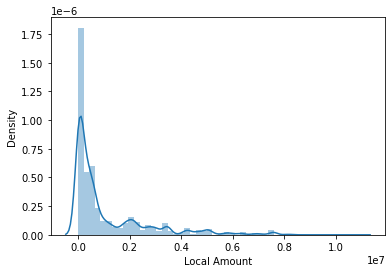

In [55]:
## data is very skewed we can see

sns.distplot(pre_data["Local Amount"])

In [56]:
pre_data1.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,INVOICE_CLASS_DM,INVOICE_CLASS_INV,CUSTOMER_NAME,RECEIPT_DATE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_TYPE
0,0,0,0,0,0,0,1,0,0,0,...,0,1,C EA Corp,2021-04-20,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,RADW Corp,2021-01-31,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,RADW Corp,2021-01-31,157500.00,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,FARO Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,RADW Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0


(array([6.7324e+04, 1.0302e+04, 6.7970e+03, 4.1970e+03, 2.7550e+03,
        1.1740e+03, 1.2460e+03, 1.3700e+02, 0.0000e+00, 5.0000e+00]),
 array([       0.  ,  1084982.88,  2169965.76,  3254948.64,  4339931.52,
         5424914.4 ,  6509897.28,  7594880.16,  8679863.04,  9764845.92,
        10849828.8 ]),
 <BarContainer object of 10 artists>)

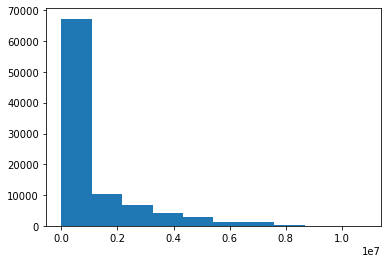

In [58]:
## checking the histogram distribution 

plt.hist(pre_data1["Local Amount"])

In [59]:
pre_data1[pre_data1["RECEIPT_DATE"]>pre_data1["DUE_DATE"]]

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,INVOICE_CLASS_DM,INVOICE_CLASS_INV,CUSTOMER_NAME,RECEIPT_DATE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_TYPE
0,0,0,0,0,0,0,1,0,0,0,...,0,1,C EA Corp,2021-04-20,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,RADW Corp,2021-01-31,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,FARO Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,RADW Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0
5,0,0,0,0,0,0,1,0,0,0,...,0,1,FARO Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,0,0,0,0,0,0,1,0,0,0,...,0,0,PEAR Corp,2021-04-01,59914.50,59914.50,2020-12-28,2020-12-28,Immediate,1
93933,0,0,0,0,0,0,1,0,0,0,...,0,0,PEAR Corp,2021-04-01,59914.50,59914.50,2020-12-28,2020-12-28,Immediate,1
93934,0,0,0,0,0,0,1,0,0,0,...,0,0,PEAR Corp,2021-04-01,59914.50,59914.50,2020-12-28,2020-12-28,Immediate,1
93935,0,0,0,0,0,0,1,0,0,0,...,0,1,NAMS Corp,2021-04-01,23574.33,23574.33,2021-01-24,2021-03-24,60 Days from Inv Date,1


In [60]:
pre_data1["RECEIPT_DATE"] >= pre_data1["DUE_DATE"]

0         True
1         True
2        False
3         True
4         True
         ...  
93932     True
93933     True
93934     True
93935     True
93936     True
Length: 93937, dtype: bool

In [61]:
pre_data1.loc[pre_data1["RECEIPT_DATE"]>= pre_data1["DUE_DATE"], "target"] = 1
pre_data1.loc[pre_data1["RECEIPT_DATE"]>= pre_data1["DUE_DATE"], "target"] = 0

In [62]:
pre_data1.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,INVOICE_CLASS_INV,CUSTOMER_NAME,RECEIPT_DATE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_TYPE,target
0,0,0,0,0,0,0,1,0,0,0,...,1,C EA Corp,2021-04-20,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,0,0.0
1,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,157500.00,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,0,NaN
3,0,0,0,0,0,0,1,0,0,0,...,1,FARO Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0,0.0
4,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0,0.0


In [63]:
pre_data1 = pre_data1.drop("target", axis= 1)

In [64]:
pre_data1.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,INVOICE_CLASS_DM,INVOICE_CLASS_INV,CUSTOMER_NAME,RECEIPT_DATE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_TYPE
0,0,0,0,0,0,0,1,0,0,0,...,0,1,C EA Corp,2021-04-20,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,RADW Corp,2021-01-31,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,RADW Corp,2021-01-31,157500.00,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,FARO Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,RADW Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0


In [65]:
## creating the target variable 

pre_data1.loc[pre_data1["RECEIPT_DATE"]>= pre_data1["DUE_DATE"], "target"] = 1
pre_data1.loc[pre_data1["RECEIPT_DATE"] < pre_data1["DUE_DATE"], "target"] = 0

In [66]:
pre_data1.target.value_counts(normalize= True)

1.0    0.679753
0.0    0.320247
Name: target, dtype: float64

In [67]:
pre_data1["target"] = pre_data1.target.astype("int32")

In [68]:
pre_data1.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,INVOICE_CLASS_INV,CUSTOMER_NAME,RECEIPT_DATE,Local Amount,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_TYPE,target
0,0,0,0,0,0,0,1,0,0,0,...,1,C EA Corp,2021-04-20,370990.92,101018.63,2020-11-02,2020-12-30,30 Days from EOM,0,1
1,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,183750.00,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,157500.00,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,FARO Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0,1
4,0,0,0,0,0,0,1,0,0,0,...,1,RADW Corp,2021-01-31,157500.00,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0,1


In [70]:
## there is not much imbalance in the data, so not applying any imbalancing technique

pre_data1.target.value_counts(normalize= True)

1    0.679753
0    0.320247
Name: target, dtype: float64

In [71]:
pre_data1.columns

Index(['RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_I/C CASH', 'RECEIPT_METHOD_I/C Check',
       'RECEIPT_METHOD_I/C WIRE', 'RECEIPT_METHOD_PDC', 'RECEIPT_METHOD_WIRE',
       'CURRENCY_CODE_BHD', 'CURRENCY_CODE_EUR', 'CURRENCY_CODE_GBP',
       'CURRENCY_CODE_KWD', 'CURRENCY_CODE_QAR', 'CURRENCY_CODE_SAR',
       'CURRENCY_CODE_USD', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'CUSTOMER_NAME', 'RECEIPT_DATE', 'Local Amount', 'USD Amount',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM', 'INVOICE_TYPE',
       'target'],
      dtype='object')

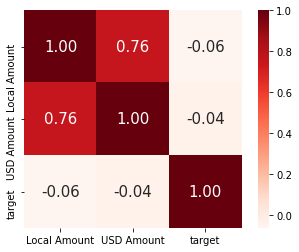

In [72]:
conti_cols = ["Local Amount", "USD Amount", "target"]

conti_cols_cors = pre_data1[conti_cols].corr()

sns.heatmap(conti_cols_cors, cbar= True , square= True , fmt= ".2f", annot = True , annot_kws={"size" : 15}, cmap= "Reds")

plt.show()

<AxesSubplot:>

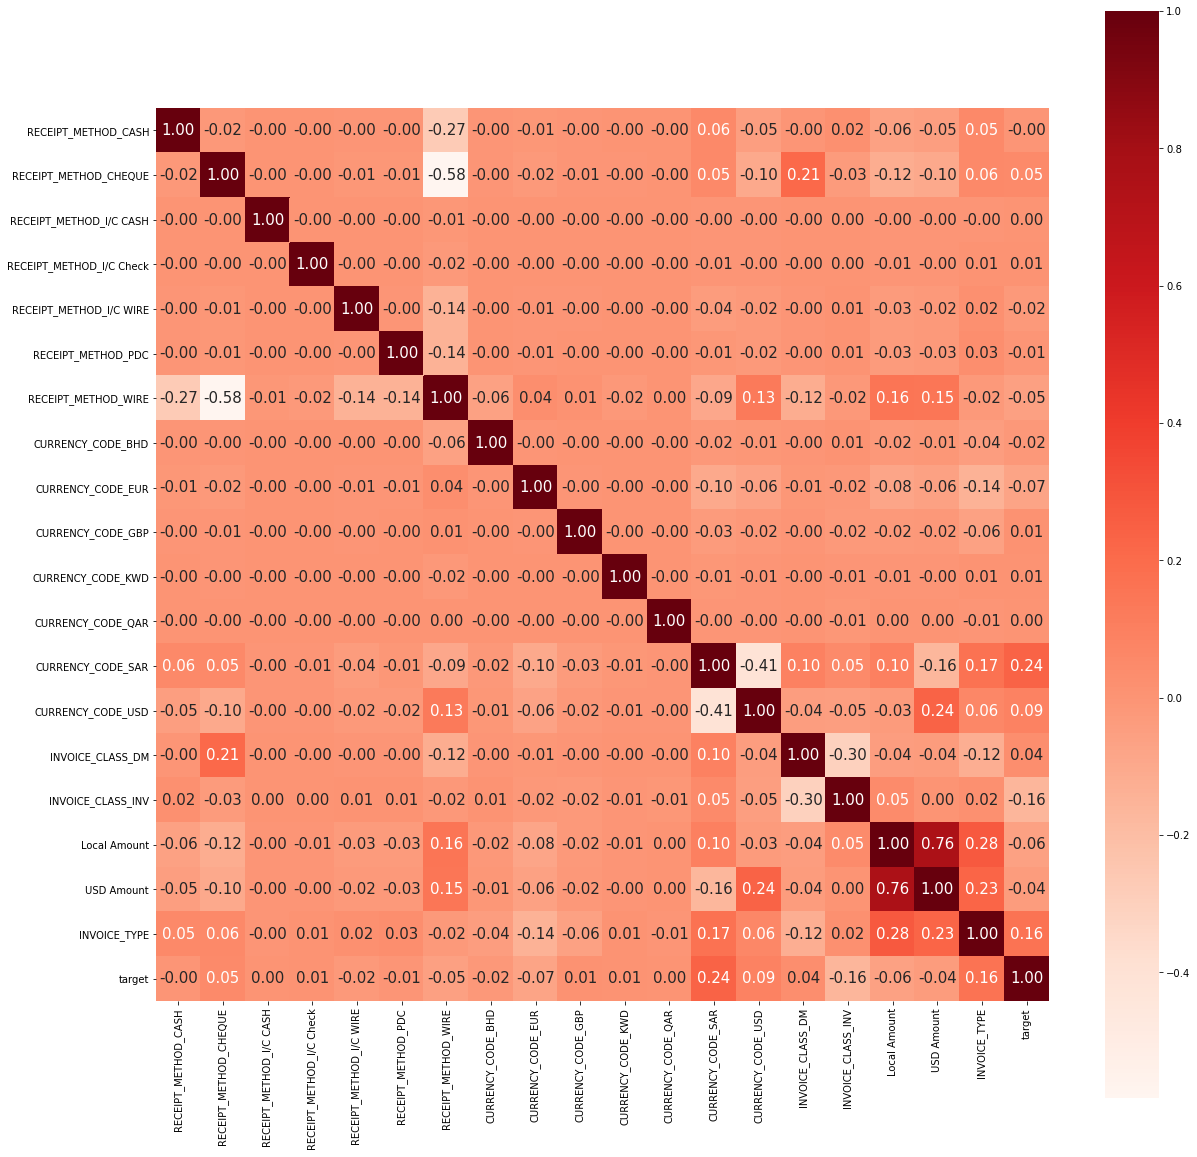

In [74]:
## checking the correlations 

plt.figure(figsize = (20,20))
sns.heatmap(pre_data1.corr(), cbar= True , square= True , fmt= ".2f", annot = True , annot_kws={"size" : 15}, cmap= "Reds")

In [75]:
pre_data1[["RECEIPT_DATE", "INVOICE_CREATION_DATE", "DUE_DATE"]].describe()

,RECEIPT_DATE,INVOICE_CREATION_DATE,DUE_DATE
count,93937,93937,93937
unique,170,1310,1203
top,2021-06-24 00:00:00,2020-12-23 00:00:00,2021-05-30 00:00:00
freq,4275,870,5362
first,2021-01-01 00:00:00,2015-01-29 00:00:00,2010-10-30 00:00:00
last,2021-06-30 00:00:00,2021-07-05 00:00:00,2022-05-09 00:00:00


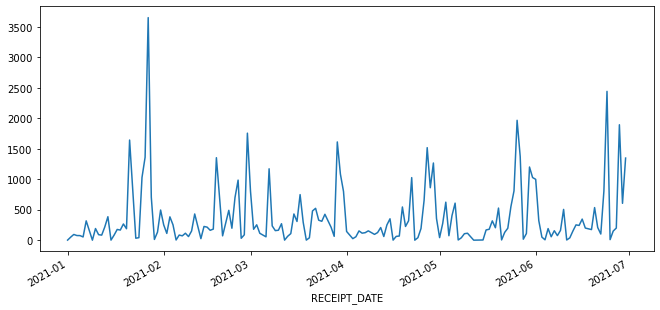

In [76]:
## visualization of the data columns 

pre_data1.groupby("RECEIPT_DATE")["target"].sum().plot(figsize = [11,5])

plt.show()

In [77]:
pre_data1.groupby("RECEIPT_DATE")["target"].sum()

RECEIPT_DATE
2021-01-01       1
2021-01-02      50
2021-01-03      94
2021-01-04      76
2021-01-05      75
              ... 
2021-06-26     149
2021-06-27     199
2021-06-28    1895
2021-06-29     605
2021-06-30    1348
Name: target, Length: 170, dtype: int32

In [78]:
pre_data1["receipt_month"]= pre_data1["RECEIPT_DATE"].dt.month

<AxesSubplot:xlabel='receipt_month'>

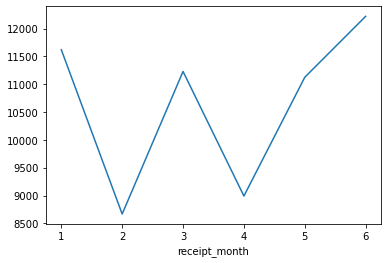

In [79]:
pre_data1.groupby("receipt_month")["target"].sum().plot()

In [80]:
pre_data1["receipt_day"]= pre_data1["RECEIPT_DATE"].dt.day

<AxesSubplot:xlabel='receipt_day'>

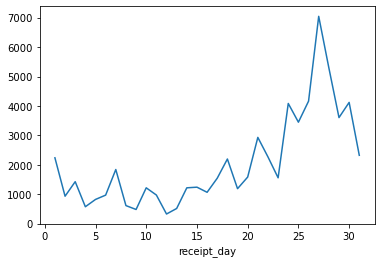

In [81]:
pre_data1.groupby("receipt_day")["target"].sum().plot()

In [82]:
pre_data1["due_day"]= pre_data1["DUE_DATE"].dt.day

In [83]:
pre_data1["due_month"]= pre_data1["DUE_DATE"].dt.month

In [84]:
pre_data1["due_day"]= pre_data1["DUE_DATE"].dt.day

In [85]:
pre_data1.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_TYPE,target,receipt_month,receipt_day,due_day,due_month
0,0,0,0,0,0,0,1,0,0,0,...,101018.63,2020-11-02,2020-12-30,30 Days from EOM,0,1,4,20,30,12
1,0,0,0,0,0,0,1,0,0,0,...,48990.21,2020-12-29,2021-01-28,30 Days from Inv Date,0,1,1,31,28,1
2,0,0,0,0,0,0,1,0,0,0,...,41991.61,2021-01-30,2021-03-01,30 Days from Inv Date,0,0,1,31,1,3
3,0,0,0,0,0,0,1,0,0,0,...,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0,1,1,31,14,1
4,0,0,0,0,0,0,1,0,0,0,...,41991.61,2020-12-15,2021-01-14,30 Days from Inv Date,0,1,1,31,14,1


<AxesSubplot:xlabel='due_day'>

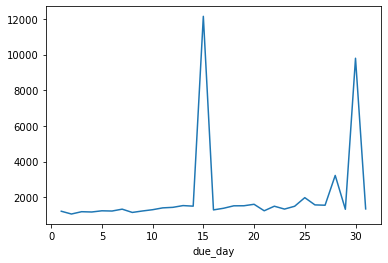

In [86]:
pre_data1.groupby("due_day")["target"].sum().plot()

In [87]:
pre_data1.columns

Index(['RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_I/C CASH', 'RECEIPT_METHOD_I/C Check',
       'RECEIPT_METHOD_I/C WIRE', 'RECEIPT_METHOD_PDC', 'RECEIPT_METHOD_WIRE',
       'CURRENCY_CODE_BHD', 'CURRENCY_CODE_EUR', 'CURRENCY_CODE_GBP',
       'CURRENCY_CODE_KWD', 'CURRENCY_CODE_QAR', 'CURRENCY_CODE_SAR',
       'CURRENCY_CODE_USD', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'CUSTOMER_NAME', 'RECEIPT_DATE', 'Local Amount', 'USD Amount',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM', 'INVOICE_TYPE',
       'target', 'receipt_month', 'receipt_day', 'due_day', 'due_month'],
      dtype='object')

In [88]:
pre_data1["receipt_year"]= pre_data1["RECEIPT_DATE"].dt.year

In [89]:
pre_data1.drop(["RECEIPT_DATE", "INVOICE_CREATION_DATE", "DUE_DATE"], axis = 1)

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_I/C CASH,RECEIPT_METHOD_I/C Check,RECEIPT_METHOD_I/C WIRE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,...,Local Amount,USD Amount,PAYMENT_TERM,INVOICE_TYPE,target,receipt_month,receipt_day,due_day,due_month,receipt_year
0,0,0,0,0,0,0,1,0,0,0,...,370990.92,101018.63,30 Days from EOM,0,1,4,20,30,12,2021
1,0,0,0,0,0,0,1,0,0,0,...,183750.00,48990.21,30 Days from Inv Date,0,1,1,31,28,1,2021
2,0,0,0,0,0,0,1,0,0,0,...,157500.00,41991.61,30 Days from Inv Date,0,0,1,31,1,3,2021
3,0,0,0,0,0,0,1,0,0,0,...,157500.00,41991.61,30 Days from Inv Date,0,1,1,31,14,1,2021
4,0,0,0,0,0,0,1,0,0,0,...,157500.00,41991.61,30 Days from Inv Date,0,1,1,31,14,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,0,0,0,0,0,0,1,0,0,0,...,59914.50,59914.50,Immediate,1,1,4,1,28,12,2021
93933,0,0,0,0,0,0,1,0,0,0,...,59914.50,59914.50,Immediate,1,1,4,1,28,12,2021
93934,0,0,0,0,0,0,1,0,0,0,...,59914.50,59914.50,Immediate,1,1,4,1,28,12,2021
93935,0,0,0,0,0,0,1,0,0,0,...,23574.33,23574.33,60 Days from Inv Date,1,1,4,1,24,3,2021


In [90]:
pre_data1.drop(["RECEIPT_DATE", "INVOICE_CREATION_DATE", "DUE_DATE"], axis = 1, inplace= True)

In [91]:
pre_data1.columns

Index(['RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_I/C CASH', 'RECEIPT_METHOD_I/C Check',
       'RECEIPT_METHOD_I/C WIRE', 'RECEIPT_METHOD_PDC', 'RECEIPT_METHOD_WIRE',
       'CURRENCY_CODE_BHD', 'CURRENCY_CODE_EUR', 'CURRENCY_CODE_GBP',
       'CURRENCY_CODE_KWD', 'CURRENCY_CODE_QAR', 'CURRENCY_CODE_SAR',
       'CURRENCY_CODE_USD', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'CUSTOMER_NAME', 'Local Amount', 'USD Amount', 'PAYMENT_TERM',
       'INVOICE_TYPE', 'target', 'receipt_month', 'receipt_day', 'due_day',
       'due_month', 'receipt_year'],
      dtype='object')

In [92]:
pre_data1.PAYMENT_TERM.value_counts(normalize= True)

60 Days from Inv Date                                      0.211525
30 Days from Inv Date                                      0.156190
60 Days from EOM                                           0.133260
30 Days from EOM                                           0.120357
15 Days from EOM                                           0.080309
Immediate Payment                                          0.058273
Immediate                                                  0.056006
90 Days from EOM                                           0.041443
45 Days from Inv Date                                      0.037791
45 Days from EOM                                           0.037355
90 Days from Inv Date                                      0.023537
100% Adv Payment                                           0.013211
25 DAYS FROM EOM                                           0.004918
Cash on Delivery                                           0.004450
15 Days from Inv Date                           

In [93]:
pre_data1.drop("PAYMENT_TERM", 1 , inplace = True)

In [95]:
## creating the X and y variables

X = pre_data1.drop("target" , axis = 1)
y = pre_data1["target"]

In [96]:
## splitting the dataset - train and test 

from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X, y , test_size = 0.3, train_size = 0.7, random_state = 42 , stratify = y)

In [97]:
print(X_train.shape, X_test.shape)

(65755, 25) (28182, 25)


In [98]:
y_train.value_counts(normalize= True)

1    0.679751
0    0.320249
Name: target, dtype: float64

In [99]:
y_test.value_counts(normalize= True)

1    0.67976
0    0.32024
Name: target, dtype: float64

In [100]:
## using log transformation for the numerical columns as the columns was skewed 

X_train["Local Amount"] = np.log1p(X_train["Local Amount"])

<AxesSubplot:xlabel='Local Amount', ylabel='Density'>

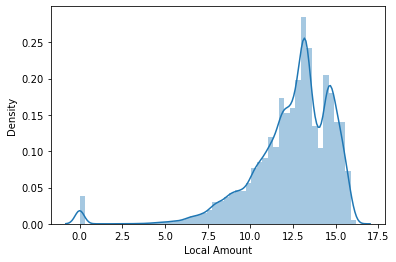

In [102]:
sns.distplot(X_train["Local Amount"])  ## now the data looks little like a normal distribution.

In [103]:
## using log transformation for the numerical columns as the columns was skewed 

X_train["USD Amount"] = np.log1p(X_train["USD Amount"])

<AxesSubplot:xlabel='USD Amount', ylabel='Density'>

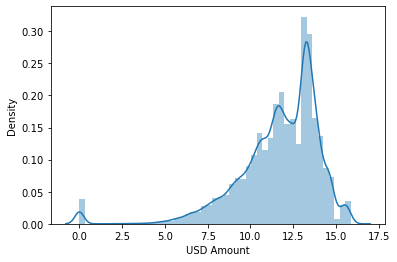

In [104]:
sns.distplot(X_train["USD Amount"])

In [120]:
## for the customer name columns, we made it 2 bucket as 80% data comes from top 20 companies made it top and rest is others 

cus_name = X_train["CUSTOMER_NAME"].value_counts(normalize = True)

In [121]:
top_cust = cus_name.cumsum()[:20].index

In [122]:
X_train["CUSTOMER_NAME"] = np.where(X_train.CUSTOMER_NAME.isin(top_cust), "top" , "others")

In [123]:
## assigning top to 1 and 0 to others company names 

X_train["CUSTOMER_NAME"] = X_train["CUSTOMER_NAME"].map({"top" : 1 , "others" : 0})

In [114]:
## intialization of the logistic regression 

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [128]:
## feature selection rfe , we selected first the top 15 features 

from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)

rfe = rfe.fit(X_train, y_train)

In [129]:
rfe.support_

array([ True,  True, False, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True, False])

In [353]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('RECEIPT_METHOD_CASH', True, 1),
 ('RECEIPT_METHOD_CHEQUE', True, 1),
 ('RECEIPT_METHOD_I/C CASH', False, 11),
 ('RECEIPT_METHOD_I/C Check', False, 9),
 ('RECEIPT_METHOD_I/C WIRE', True, 1),
 ('RECEIPT_METHOD_PDC', False, 5),
 ('RECEIPT_METHOD_WIRE', False, 3),
 ('CURRENCY_CODE_BHD', True, 1),
 ('CURRENCY_CODE_EUR', True, 1),
 ('CURRENCY_CODE_GBP', True, 1),
 ('CURRENCY_CODE_KWD', False, 8),
 ('CURRENCY_CODE_QAR', False, 10),
 ('CURRENCY_CODE_SAR', True, 1),
 ('CURRENCY_CODE_USD', True, 1),
 ('INVOICE_CLASS_DM', True, 1),
 ('INVOICE_CLASS_INV', True, 1),
 ('CUSTOMER_NAME', False, 2),
 ('Local Amount', True, 1),
 ('USD Amount', True, 1),
 ('INVOICE_TYPE', True, 1),
 ('receipt_month', False, 4),
 ('receipt_day', False, 6),
 ('due_day', True, 1),
 ('due_month', True, 1),
 ('receipt_year', False, 7)]

In [130]:
col = X_train.columns[rfe.support_]

In [131]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65739
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30851.
Date:                Tue, 13 Dec 2022   Deviance:                       61703.
Time:                        18:02:49   Pearson chi2:                 8.16e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.1775      0.153     46.792      0.000       6.877       7.478
RECEIPT_METHOD_CASH      -1.2107      0.114    -10.613      0.000      -1.434      -0.987
RECEIPT_METHOD_CHEQUE     0.2975      0.071      4.182      0.000       0.158       0.437
RECEIPT_METHOD_WIRE      -0.1793      0.045     -3.996      0.000      -0.267      -0.091
CURRENCY_CODE_BHD        -2.1723      0.359     -6.051      0.000      -2.876      -1.469
CURRENCY_CODE_EUR        -0.8207      0.080    -10.240      0.000      -0.978      -0.664
CURRENCY_CODE_GBP         1.7672      0.338      5.223      0.000       1.104       2.430
CURRENCY_CODE_SAR         0.8915      0.028     31.352      0.000       0.836       0.947
CURRENCY_CODE_USD         0.7592      0.029     25.942      0.000       0.702       0.817
INVOICE_CLASS_DM         -1.8532      0.213     -8.691      0.000      -2.271      -1.435
INVOICE_CLASS_INV        -3.5598      0.131    -27.240      0.000      -3.816      -3.304
Local Amount              0.0801      0.022      3.684      0.000       0.037       0.123
USD Amount               -0.1942      0.022     -8.757      0.000      -0.238      -0.151
INVOICE_TYPE              0.4428      0.024     18.492      0.000       0.396       0.490
due_day                  -0.1194      0.001    -80.549      0.000      -0.122      -0.116
due_month                 0.1116      0.004     30.619      0.000       0.104       0.119
=========================================================================================
"""

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
10,Local Amount,885.71
11,USD Amount,846.14
9,INVOICE_CLASS_INV,14.56
2,RECEIPT_METHOD_WIRE,13.97
13,due_day,6.83
12,INVOICE_TYPE,4.58
6,CURRENCY_CODE_SAR,3.48
14,due_month,3.02
7,CURRENCY_CODE_USD,1.90
1,RECEIPT_METHOD_CHEQUE,1.54


In [141]:
col = col.drop("USD Amount", 1)
col

Index(['RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE', 'RECEIPT_METHOD_WIRE',
       'CURRENCY_CODE_BHD', 'CURRENCY_CODE_EUR', 'CURRENCY_CODE_GBP',
       'CURRENCY_CODE_SAR', 'CURRENCY_CODE_USD', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'Local Amount', 'INVOICE_TYPE', 'due_day',
       'due_month'],
      dtype='object')

In [142]:
vif = pd.DataFrame()
vif["features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
10,Local Amount,23.67
9,INVOICE_CLASS_INV,14.46
2,RECEIPT_METHOD_WIRE,13.52
12,due_day,6.77
11,INVOICE_TYPE,4.58
13,due_month,3.02
6,CURRENCY_CODE_SAR,2.26
7,CURRENCY_CODE_USD,1.64
1,RECEIPT_METHOD_CHEQUE,1.54
8,INVOICE_CLASS_DM,1.20


In [143]:
col = col.drop("INVOICE_CLASS_INV", 1)



In [144]:
vif = pd.DataFrame()
vif["features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
9,Local Amount,19.66
2,RECEIPT_METHOD_WIRE,12.80
11,due_day,6.28
10,INVOICE_TYPE,4.57
12,due_month,3.01
6,CURRENCY_CODE_SAR,2.20
7,CURRENCY_CODE_USD,1.63
1,RECEIPT_METHOD_CHEQUE,1.47
0,RECEIPT_METHOD_CASH,1.09
8,INVOICE_CLASS_DM,1.09


In [145]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65741
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31918.
Date:                Tue, 13 Dec 2022   Deviance:                       63835.
Time:                        18:10:10   Pearson chi2:                 8.03e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.7664      0.079     47.648      0.000       3.611       3.921
RECEIPT_METHOD_CASH      -1.2448      0.114    -10.949      0.000      -1.468      -1.022
RECEIPT_METHOD_CHEQUE     0.3165      0.071      4.454      0.000       0.177       0.456
RECEIPT_METHOD_WIRE      -0.1754      0.044     -3.987      0.000      -0.262      -0.089
CURRENCY_CODE_BHD        -2.5652      0.358     -7.166      0.000      -3.267      -1.864
CURRENCY_CODE_EUR        -0.7265      0.075     -9.714      0.000      -0.873      -0.580
CURRENCY_CODE_GBP         1.6908      0.333      5.077      0.000       1.038       2.343
CURRENCY_CODE_SAR         0.9615      0.024     40.866      0.000       0.915       1.008
CURRENCY_CODE_USD         0.6427      0.027     24.128      0.000       0.591       0.695
INVOICE_CLASS_DM          1.6731      0.169      9.907      0.000       1.342       2.004
Local Amount             -0.1086      0.005    -22.819      0.000      -0.118      -0.099
INVOICE_TYPE              0.4373      0.023     18.656      0.000       0.391       0.483
due_day                  -0.1199      0.001    -82.279      0.000      -0.123      -0.117
due_month                 0.1153      0.004     32.843      0.000       0.108       0.122
=========================================================================================
"""

In [146]:
y_train_pred = res.predict(X_train_sm)

y_train_pred[:10]

55150    0.293306
10104    0.478695
22679    0.301879
8976     0.464393
42438    0.902434
41519    0.917027
21799    0.811906
71245    0.569282
50805    0.339495
49870    0.370808
dtype: float64

In [147]:
y_train_pred_final = pd.DataFrame({'default':y_train.values, 'default_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,default,default_Prob,CustID
55150,0,0.293306,55150
10104,0,0.478695,10104
22679,0,0.301879,22679
8976,0,0.464393,8976
42438,1,0.902434,42438


In [148]:
y_train_pred_final['predicted'] = y_train_pred_final.default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,default,default_Prob,CustID,predicted
55150,0,0.293306,55150,0
10104,0,0.478695,10104,0
22679,0,0.301879,22679,0
8976,0,0.464393,8976,0
42438,1,0.902434,42438,1


In [149]:
from sklearn import metrics 

In [150]:
confusion = metrics.confusion_matrix(y_train_pred_final.default, y_train_pred_final.predicted)

print(confusion)

[[12864  8194]
 [ 5946 38751]]


In [151]:
print(metrics.accuracy_score(y_train_pred_final.default, y_train_pred_final.predicted))

0.7849593186829898


In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.866970937646822

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.6108842245227467

In [155]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3891157754772533


In [156]:
# positive predictive value 
print (TP / float(TP+FP))

0.8254553200553839


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6838915470494418


In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.default, y_train_pred_final.default_Prob, drop_intermediate = False )

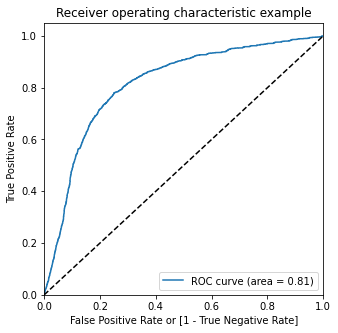

In [160]:
draw_roc(y_train_pred_final.default, y_train_pred_final.default_Prob)

In [161]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,default,default_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
55150,0,0.293306,55150,0,1,1,1,0,0,0,0,0,0,0
10104,0,0.478695,10104,0,1,1,1,1,1,0,0,0,0,0
22679,0,0.301879,22679,0,1,1,1,1,0,0,0,0,0,0
8976,0,0.464393,8976,0,1,1,1,1,1,0,0,0,0,0
42438,1,0.902434,42438,1,1,1,1,1,1,1,1,1,1,1


In [162]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.679751  1.000000  0.000000
0.1   0.1  0.679811  0.999933  0.000332
0.2   0.2  0.680009  0.997338  0.006458
0.3   0.3  0.712113  0.976441  0.151059
0.4   0.4  0.774070  0.920017  0.464289
0.5   0.5  0.784959  0.866971  0.610884
0.6   0.6  0.770162  0.789091  0.729984
0.7   0.7  0.735609  0.701300  0.808434
0.8   0.8  0.671006  0.578428  0.867509
0.9   0.9  0.525633  0.336645  0.926774


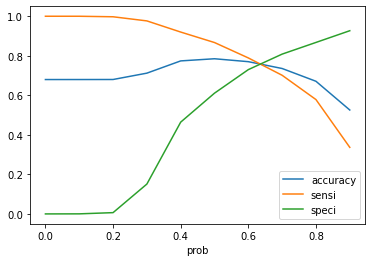

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [164]:
## THE cutoff was chosen as 0.65 the intersection of all the accuracy, spec , sensi 

y_train_pred_final['final_predicted'] = y_train_pred_final.default_Prob.map( lambda x: 1 if x > 0.65 else 0)

y_train_pred_final.head()

,default,default_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
55150,0,0.293306,55150,0,1,1,1,0,0,0,0,0,0,0,0
10104,0,0.478695,10104,0,1,1,1,1,1,0,0,0,0,0,0
22679,0,0.301879,22679,0,1,1,1,1,0,0,0,0,0,0,0
8976,0,0.464393,8976,0,1,1,1,1,1,0,0,0,0,0,0
42438,1,0.902434,42438,1,1,1,1,1,1,1,1,1,1,1,1


In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.default, y_train_pred_final.final_predicted)

0.7537829822827161

In [166]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.default, y_train_pred_final.final_predicted )
confusion2

array([[16385,  4673],
       [11517, 33180]], dtype=int64)

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Let us calculate specificity
TN / float(TN+FP)

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# Positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))


0.2219109127172571
0.8765487543919901
0.5872338900437245


In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.778089087282743

In [170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7423317001141017

In [171]:
#Looking at the confusion matrix again


confusion = metrics.confusion_matrix(y_train_pred_final.default, y_train_pred_final.predicted )
confusion

array([[12864,  8194],
       [ 5946, 38751]], dtype=int64)

In [172]:
## precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8254553200553839

In [173]:
## recall 

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.866970937646822

In [174]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.default, y_train_pred_final.predicted

(55150    0
 10104    0
 22679    0
 8976     0
 42438    1
         ..
 67081    1
 7238     0
 39017    1
 45959    0
 39667    1
 Name: default, Length: 65755, dtype: int32,
 55150    0
 10104    0
 22679    0
 8976     0
 42438    1
         ..
 67081    1
 7238     0
 39017    1
 45959    0
 39667    1
 Name: predicted, Length: 65755, dtype: int64)

In [175]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.default, y_train_pred_final.default_Prob)

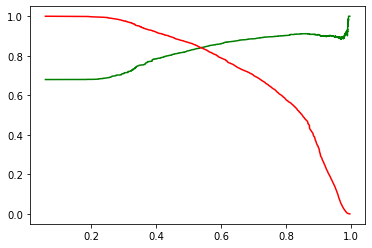

In [176]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [177]:
X_train_sm.shape

(65755, 14)

In [178]:
X_test.shape

(28182, 25)

In [179]:
X_test = X_test[col]

X_test.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_SAR,CURRENCY_CODE_USD,INVOICE_CLASS_DM,Local Amount,INVOICE_TYPE,due_day,due_month
83371,0,0,1,0,0,0,1,0,0,663897.88,0,25,6
18414,0,0,1,0,0,0,1,0,0,18460.02,0,30,4
63199,0,0,1,0,0,0,0,1,0,5814128.07,1,24,4
54808,0,0,1,0,0,0,0,0,0,3470536.98,1,28,2
53767,0,0,0,0,0,0,0,0,0,2845998.47,0,30,1


In [180]:
X_test.shape

(28182, 13)

In [181]:
X_test["Local Amount"] = np.log1p(X_test["Local Amount"])

In [182]:
X_test.head()

,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_SAR,CURRENCY_CODE_USD,INVOICE_CLASS_DM,Local Amount,INVOICE_TYPE,due_day,due_month
83371,0,0,1,0,0,0,1,0,0,13.405885,0,25,6
18414,0,0,1,0,0,0,1,0,0,9.823417,0,30,4
63199,0,0,1,0,0,0,0,1,0,15.575802,1,24,4
54808,0,0,1,0,0,0,0,0,0,15.059820,1,28,2
53767,0,0,0,0,0,0,0,0,0,14.861425,0,30,1


In [183]:
X_test_sm = sm.add_constant(X_test)

In [184]:
X_test_sm.shape

(28182, 14)

In [185]:
y_test_pred = res.predict(X_test_sm)

In [186]:
y_test_pred[:10]

83371    0.688208
18414    0.586791
63199    0.637358
54808    0.324549
53767    0.209436
80554    0.964505
81710    0.867808
60060    0.624521
10550    0.935616
17556    0.840767
dtype: float64

In [187]:
 ##Converting y_pred to a dataframe which is an array
    
y_pred_1 = pd.DataFrame(y_test_pred)

In [188]:
# Let's see the head
y_pred_1.head()

,0
83371,0.688208
18414,0.586791
63199,0.637358
54808,0.324549
53767,0.209436


In [189]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [190]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [191]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [192]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [193]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'default_Prob'})

In [194]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','default','default_Prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [195]:
y_pred_final.columns = ["default", "CustID", "default_Prob"]

In [196]:
y_pred_final.head()

,default,CustID,default_Prob
0,0,83371,0.688208
1,0,18414,0.586791
2,1,63199,0.637358
3,1,54808,0.324549
4,0,53767,0.209436


In [197]:
y_pred_final['final_predicted'] = y_pred_final.default_Prob.map(lambda x: 1 if x > 0.62 else 0)

In [198]:
y_pred_final.head()

,default,CustID,default_Prob,final_predicted
0,0,83371,0.688208,1
1,0,18414,0.586791,0
2,1,63199,0.637358,1
3,1,54808,0.324549,0
4,0,53767,0.209436,0


In [199]:
# Let's check the overall accuracy.


metrics.accuracy_score(y_pred_final.default, y_pred_final.final_predicted)

0.7579305939961678

In [200]:
confusion2 = metrics.confusion_matrix(y_pred_final.default, y_pred_final.final_predicted )
confusion2

array([[ 6691,  2334],
       [ 4488, 14669]], dtype=int64)

In [201]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [202]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7657253223364827

In [203]:
TN / float(TN+FP)

0.7413850415512465

In [204]:
X_test_sm.columns

Index(['const', 'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_WIRE', 'CURRENCY_CODE_BHD', 'CURRENCY_CODE_EUR',
       'CURRENCY_CODE_GBP', 'CURRENCY_CODE_SAR', 'CURRENCY_CODE_USD',
       'INVOICE_CLASS_DM', 'Local Amount', 'INVOICE_TYPE', 'due_day',
       'due_month'],
      dtype='object')

In [205]:
inv_data = pd.read_csv("Open_Invoice_data.csv",  encoding =('ISO-8859-1'),low_memory =False)
inv_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [206]:
inv_data.shape

(88204, 14)

In [207]:
inv_data1 = inv_data[inv_data["AGE"] < 0]

In [208]:
inv_data1.shape

(28080, 14)

In [209]:
X

,const,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_SAR,CURRENCY_CODE_USD,INVOICE_CLASS_DM,Local Amount,INVOICE_TYPE,due_day,due_month
55150,1.0,0,0,1,0,0,0,0,0,0,15.262370,1,30,3
10104,1.0,0,0,1,0,0,0,0,1,0,13.027278,0,30,6
22679,1.0,0,0,1,0,0,0,0,0,0,14.884635,1,30,3
8976,1.0,0,0,1,0,0,0,0,1,0,12.493862,0,30,5
42438,1.0,0,0,1,0,0,0,1,0,0,14.215701,1,15,5


In [210]:
inv_data1.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30
5,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000106,03/03/2022,30 Days from EOM,30/04/2022,AED,"1,264",INVOICE,-25,"1,264",3/3/2022 22:30
6,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000124,15/03/2022,30 Days from EOM,30/04/2022,AED,"25,858",INVOICE,-25,"25,858",3/15/2022 19:06
7,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000125,15/03/2022,30 Days from EOM,30/04/2022,AED,"39,873",INVOICE,-25,"39,873",3/15/2022 19:06


In [225]:
inv_data2 = inv_data1[["Due Date", "Transaction Currency", "Local Amount", "Transaction Class"]]

In [227]:
inv_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 2 to 88189
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Due Date              28080 non-null  object
 1   Transaction Currency  28080 non-null  object
 2   Local Amount          28080 non-null  object
 3   Transaction Class     28080 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [230]:
inv_data2["Due Date"] = inv_data2["Due Date"].astype("datetime64[ns]")

In [231]:
inv_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 2 to 88189
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Due Date              28080 non-null  datetime64[ns]
 1   Transaction Currency  28080 non-null  object        
 2   Local Amount          28080 non-null  object        
 3   Transaction Class     28080 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


In [232]:
inv_data2["Due_day"] = inv_data2["Due Date"].dt.day

In [234]:
inv_data2["Due_month"] = inv_data2["Due Date"].dt.month

In [235]:
inv_data2 = inv_data2["Transaction Class"] == "DEBIT NOTE"

,Due Date,Transaction Currency,Local Amount,Transaction Class,Due_day,Due_month
2,2022-04-23,USD,"2,000",INVOICE,23,4
4,2022-04-30,AED,"3,800",INVOICE,30,4
5,2022-04-30,AED,"1,264",INVOICE,30,4
6,2022-04-30,AED,"25,858",INVOICE,30,4
7,2022-04-30,AED,"39,873",INVOICE,30,4
...,...,...,...,...,...,...
88172,2022-05-29,USD,"3,435",INVOICE,29,5
88186,2022-06-05,USD,"114,039",INVOICE,5,6
88187,2022-05-16,USD,"32,138",INVOICE,16,5
88188,2022-05-17,USD,"26,764",INVOICE,17,5


In [242]:
inv_data2 = inv_data2[inv_data2["Transaction Class"].isin(["INVOICE", "DEBIT NOTE", "CREDIT NOTE"])]

In [244]:
inv_data2["Transaction Class"]= inv_data2["Transaction Class"].map({"INVOICE" : "INV" , "DEBIT NOTE" : "DM" , "CREDIT NOTE" : "CM"})

In [245]:
inv_data2.head()

,Due Date,Transaction Currency,Local Amount,Transaction Class,Due_day,Due_month
2,2022-04-23,USD,"2,000",INV,23,4
4,2022-04-30,AED,"3,800",INV,30,4
5,2022-04-30,AED,"1,264",INV,30,4
6,2022-04-30,AED,"25,858",INV,30,4
7,2022-04-30,AED,"39,873",INV,30,4


In [246]:
dummy2 = pd.get_dummies(inv_data2[["Transaction Currency", "Transaction Class"]], drop_first = True )

In [248]:
dummy2.head()

,Transaction Currency_BHD,Transaction Currency_EGP,Transaction Currency_EUR,Transaction Currency_GBP,Transaction Currency_HKD,Transaction Currency_JOD,Transaction Currency_KWD,Transaction Currency_OMR,Transaction Currency_QAR,Transaction Currency_SAR,Transaction Currency_SGD,Transaction Currency_USD,Transaction Currency_ZAR,Transaction Class_INV
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [250]:
inv_data2["Transaction Class"].value_counts()

INV    27770
DM       285
Name: Transaction Class, dtype: int64

In [251]:
dummy3 = pd.get_dummies(inv_data2[["Transaction Currency", "Transaction Class"]])

In [252]:
dummy3

,Transaction Currency_AED,Transaction Currency_BHD,Transaction Currency_EGP,Transaction Currency_EUR,Transaction Currency_GBP,Transaction Currency_HKD,Transaction Currency_JOD,Transaction Currency_KWD,Transaction Currency_OMR,Transaction Currency_QAR,Transaction Currency_SAR,Transaction Currency_SGD,Transaction Currency_USD,Transaction Currency_ZAR,Transaction Class_DM,Transaction Class_INV
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88172,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
88186,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
88187,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
88188,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [253]:
inv_data3 = pd.concat([dummy3, inv_data2], axis= 1)

In [255]:
inv_data3.columns

Index(['Transaction Currency_AED', 'Transaction Currency_BHD',
       'Transaction Currency_EGP', 'Transaction Currency_EUR',
       'Transaction Currency_GBP', 'Transaction Currency_HKD',
       'Transaction Currency_JOD', 'Transaction Currency_KWD',
       'Transaction Currency_OMR', 'Transaction Currency_QAR',
       'Transaction Currency_SAR', 'Transaction Currency_SGD',
       'Transaction Currency_USD', 'Transaction Currency_ZAR',
       'Transaction Class_DM', 'Transaction Class_INV', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'Due_day',
       'Due_month'],
      dtype='object')

In [256]:
X_test_sm.columns

Index(['const', 'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_WIRE', 'CURRENCY_CODE_BHD', 'CURRENCY_CODE_EUR',
       'CURRENCY_CODE_GBP', 'CURRENCY_CODE_SAR', 'CURRENCY_CODE_USD',
       'INVOICE_CLASS_DM', 'Local Amount', 'INVOICE_TYPE', 'due_day',
       'due_month'],
      dtype='object')

In [257]:
col2 = ['Transaction Currency_AED', "Transaction Currency_EGP", "Transaction Currency_HKD", "Transaction Currency_JOD" , "Transaction Currency_KWD", "Transaction Currency_OMR", "Transaction Currency_QAR", "Transaction Currency_SGD", "Transaction Currency_ZAR", "Transaction Class_INV", "Due Date", "Transaction Currency", "Transaction Class"] 

inv_data3 = inv_data3.drop(col2, axis=1 , inplace= True)

In [266]:
inv_data3 = pd.concat([dummy3, inv_data2], axis= 1)

In [268]:
inv_data3.drop(inv_data3[col2], axis=1 , inplace= True)

In [269]:
inv_data3

,Transaction Currency_BHD,Transaction Currency_EUR,Transaction Currency_GBP,Transaction Currency_SAR,Transaction Currency_USD,Transaction Class_DM,Local Amount,Due_day,Due_month
2,0,0,0,0,1,0,"2,000",23,4
4,0,0,0,0,0,0,"3,800",30,4
5,0,0,0,0,0,0,"1,264",30,4
6,0,0,0,0,0,0,"25,858",30,4
7,0,0,0,0,0,0,"39,873",30,4
...,...,...,...,...,...,...,...,...,...
88172,0,0,0,0,1,0,"3,435",29,5
88186,0,0,0,0,1,0,"114,039",5,6
88187,0,0,0,0,1,0,"32,138",16,5
88188,0,0,0,0,1,0,"26,764",17,5


In [281]:
## using log transformation for the numerical columns as the columns was skewed 

inv_data3["Local Amount"] = inv_data3["Local Amount"].str.replace(",", "").astype(float)

In [285]:
inv_data3["Local Amount"] = np.log1p(inv_data3["Local Amount"])

In [286]:
inv_data3

,Transaction Currency_BHD,Transaction Currency_EUR,Transaction Currency_GBP,Transaction Currency_SAR,Transaction Currency_USD,Transaction Class_DM,Local Amount,Due_day,Due_month
2,0,0,0,0,1,0,7.601402,23,4
4,0,0,0,0,0,0,8.243019,30,4
5,0,0,0,0,0,0,7.142827,30,4
6,0,0,0,0,0,0,10.160414,30,4
7,0,0,0,0,0,0,10.593480,30,4
...,...,...,...,...,...,...,...,...,...
88172,0,0,0,0,1,0,8.142063,29,5
88186,0,0,0,0,1,0,11.644305,5,6
88187,0,0,0,0,1,0,10.377826,16,5
88188,0,0,0,0,1,0,10.194850,17,5


In [287]:
X_train_sm.columns

Index(['const', 'RECEIPT_METHOD_CASH', 'RECEIPT_METHOD_CHEQUE',
       'RECEIPT_METHOD_WIRE', 'CURRENCY_CODE_BHD', 'CURRENCY_CODE_EUR',
       'CURRENCY_CODE_GBP', 'CURRENCY_CODE_SAR', 'CURRENCY_CODE_USD',
       'INVOICE_CLASS_DM', 'Local Amount', 'INVOICE_TYPE', 'due_day',
       'due_month'],
      dtype='object')

In [288]:
inv_data3.columns = ["CURRENCY_CODE_BHD", "CURRENCY_CODE_EUR", "CURRENCY_CODE_GBP", "CURRENCY_CODE_SAR", "CURRENCY_CODE_USD", "INVOICE_CLASS_DM", "Local Amount", "due_day", "due_month" ]

In [289]:
inv_data3.head()

,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_SAR,CURRENCY_CODE_USD,INVOICE_CLASS_DM,Local Amount,due_day,due_month
2,0,0,0,0,1,0,7.601402,23,4
4,0,0,0,0,0,0,8.243019,30,4
5,0,0,0,0,0,0,7.142827,30,4
6,0,0,0,0,0,0,10.160414,30,4
7,0,0,0,0,0,0,10.593480,30,4


In [295]:
X_train_sm

,const,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_WIRE,CURRENCY_CODE_BHD,CURRENCY_CODE_EUR,CURRENCY_CODE_GBP,CURRENCY_CODE_SAR,CURRENCY_CODE_USD,INVOICE_CLASS_DM,Local Amount,INVOICE_TYPE,due_day,due_month
55150,1.0,0,0,1,0,0,0,0,0,0,15.262370,1,30,3
10104,1.0,0,0,1,0,0,0,0,1,0,13.027278,0,30,6
22679,1.0,0,0,1,0,0,0,0,0,0,14.884635,1,30,3
8976,1.0,0,0,1,0,0,0,0,1,0,12.493862,0,30,5
42438,1.0,0,0,1,0,0,0,1,0,0,14.215701,1,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67081,1.0,0,0,1,0,0,0,0,0,0,12.491332,1,8,2
7238,1.0,0,0,0,0,0,0,0,0,0,10.860342,1,28,2
39017,1.0,0,0,0,0,0,0,1,0,0,12.988222,1,12,10
45959,1.0,0,0,0,0,0,0,1,0,0,14.325529,0,30,1


In [292]:
col3 = ["CURRENCY_CODE_BHD", "CURRENCY_CODE_EUR", "CURRENCY_CODE_GBP", "CURRENCY_CODE_SAR", "CURRENCY_CODE_USD", "INVOICE_CLASS_DM", "Local Amount", "due_day", "due_month"]

In [296]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col3])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65745
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32204.
Date:                Tue, 13 Dec 2022   Deviance:                       64409.
Time:                        19:51:16   Pearson chi2:                 8.01e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6124      0.068     53.158      0.000       3.479       3.746
CURRENCY_CODE_BHD    -2.6424      0.356     -7.419      0.000      -3.340      -1.944
CURRENCY_CODE_EUR    -0.8770      0.074    -11.884      0.000      -1.022      -0.732
CURRENCY_CODE_GBP     1.4307      0.333      4.294      0.000       0.778       2.084
CURRENCY_CODE_SAR     0.9952      0.023     42.888      0.000       0.950       1.041
CURRENCY_CODE_USD     0.6599      0.026     25.056      0.000       0.608       0.712
INVOICE_CLASS_DM      1.6290      0.166      9.830      0.000       1.304       1.954
Local Amount         -0.0787      0.004    -18.741      0.000      -0.087      -0.071
due_day              -0.1238      0.001    -85.771      0.000      -0.127      -0.121
due_month             0.1158      0.003     33.223      0.000       0.109       0.123
=====================================================================================
"""

In [297]:
y_train_pred_new = res.predict(X_train_sm)

y_train_pred_new[:10]

55150    0.277682
10104    0.556571
22679    0.283687
8976     0.538292
42438    0.901166
41519    0.918878
21799    0.797851
71245    0.607410
50805    0.406626
49870    0.424045
dtype: float64

In [298]:
y_train_pred_final1 = pd.DataFrame({'default':y_train.values, 'default_Prob':y_train_pred})
y_train_pred_final1['CustID'] = y_train.index
y_train_pred_final1.head()

,default,default_Prob,CustID
55150,0,0.293306,55150
10104,0,0.478695,10104
22679,0,0.301879,22679
8976,0,0.464393,8976
42438,1,0.902434,42438


In [300]:
y_train_pred_final1['predicted'] = y_train_pred_final1.default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final1.head()

,default,default_Prob,CustID,predicted
55150,0,0.293306,55150,0
10104,0,0.478695,10104,0
22679,0,0.301879,22679,0
8976,0,0.464393,8976,0
42438,1,0.902434,42438,1


In [301]:
print(metrics.accuracy_score(y_train_pred_final1.default, y_train_pred_final1.predicted))

0.7849593186829898


In [302]:
X_test_sm2 = sm.add_constant(inv_data3)

In [306]:
y_test_pred = res.predict(X_test_sm2)

In [307]:
y_test_pred[:10]

2     0.784065
4     0.428619
5     0.449953
6     0.392106
7     0.384009
8     0.372293
9     0.395189
10    0.394192
11    0.441024
12    0.438315
dtype: float64

In [308]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [309]:
y_test_df = pd.DataFrame(y_test)

In [310]:
y_test_df['CustID'] = y_test_df.index

In [311]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [312]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [313]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'default_Prob'})

In [314]:
y_pred_final.columns = ["default", "CustID", "default_Prob"]

In [315]:
y_pred_final['final_predicted'] = y_pred_final.default_Prob.map(lambda x: 1 if x > 0.58 else 0)

In [316]:
# Let's check the overall accuracy.


metrics.accuracy_score(y_pred_final.default, y_pred_final.final_predicted) ## this is the accuracy of the real data set 

0.5663544106167057

In [317]:
confusion2 = metrics.confusion_matrix(y_pred_final.default, y_pred_final.final_predicted )
confusion2

array([[ 2782,  6243],
       [ 5978, 13179]], dtype=int64)

In [318]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


TP / float(TP+FN)  ## this is the actual sensitivity on the real_test data set 


0.687946964556037

In [319]:
TN / float(TN+FP)

0.3082548476454294

In [320]:
## so finally we have around 69% sensitivity on the invoice data set 

# This assignment has been completely done by saptarshi das , i was not assigned with any students in the group case study please note and give the score accoredingly.